In [1]:
import numpy as np 

In [2]:
class AdalineGD: 
    def __init__(self, lr: float = 0.01, epochs: int = 50, seed: int = 1):
        self.lr = lr 
        self.epochs = epochs 
        self.seed = seed 
    
    def fit(self, X: np.ndarray, y: np.ndarray): 
        rgen = np.random.RandomState(self.seed) 
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = 0.0  
        self.losses_ = [] 

        for i in range(self.epochs): 
            net_input = self.net_input(X) 
            output = self.activation(net_input) 
            errors = y - output
            self.w_ += self.lr * 2.0 * X.T.dot(errors) / X.shape[0] 
            self.b_ += self.lr * 2.0 * errors.mean() 
            loss = (errors**2).mean() # MSE 
            self.losses_.append(loss)
        return self  
    
    def net_input(self, X: np.ndarray): 
        return np.dot(X, self.w_) + self.b_ 
    
    def activation(self, X: np.ndarray): 
        return X 
    
    def predict(self, X: np.ndarray): 
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


In [4]:
import pandas as pd 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, encoding='utf-8') 
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


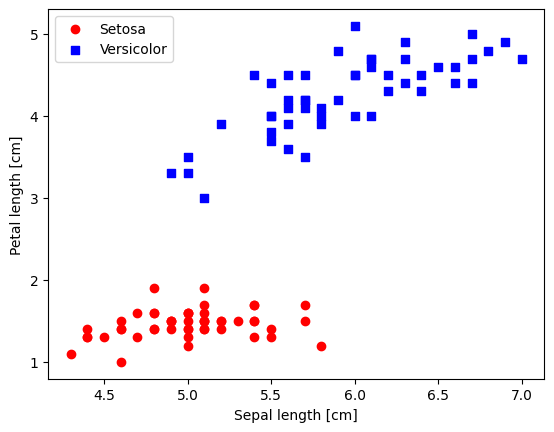

In [5]:
import matplotlib.pyplot as plt 
y = df.iloc[0:100, 4].values 
y = np.where(y == 'Iris-setosa', 0, 1) 
X = df.iloc[0:100, [0, 2]].values 
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor') 
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]') 
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Adaline - LR 0.0001')

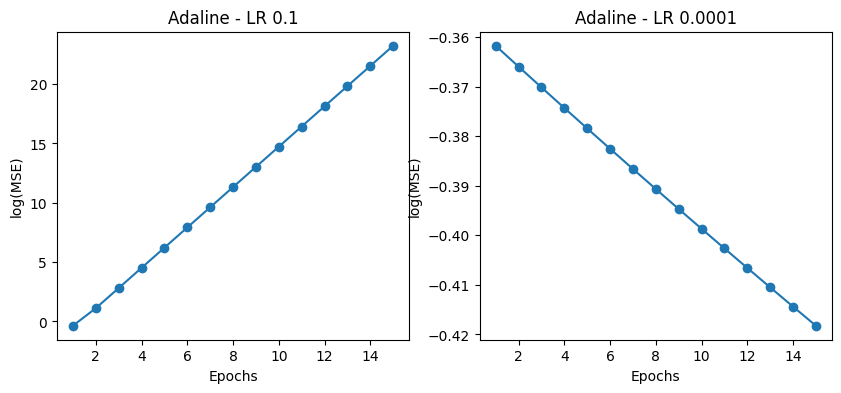

In [10]:
# Comparing Learning Rates 
import matplotlib.pyplot as plt 

# Exploding 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) 
model = AdalineGD(epochs=15, lr=0.1).fit(X, y) 
ax[0].plot(range(1, len(model.losses_) + 1), np.log10(model.losses_), marker='o') 
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(MSE)')
ax[0].set_title('Adaline - LR 0.1') 

model_2 = AdalineGD(epochs=15, lr=0.0001).fit(X, y) 
ax[1].plot(range(1, len(model_2.losses_) + 1), np.log10(model_2.losses_), marker='o') 
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(MSE)')
ax[1].set_title('Adaline - LR 0.0001') 

In [18]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()

X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std() 
std_model = AdalineGD(epochs=20, lr=0.05).fit(X_std, y) 


In [19]:
from matplotlib.colors import ListedColormap 
def plot_decision_regions(X: np.ndarray, y: np.ndarray, classifier: AdalineGD, resolution:float = 0.02): 
    markers = ('o', 's', '^', 'v', '>')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) 

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)) 
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1], 
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f'Class {cl}',
            edgecolor='black'
        )

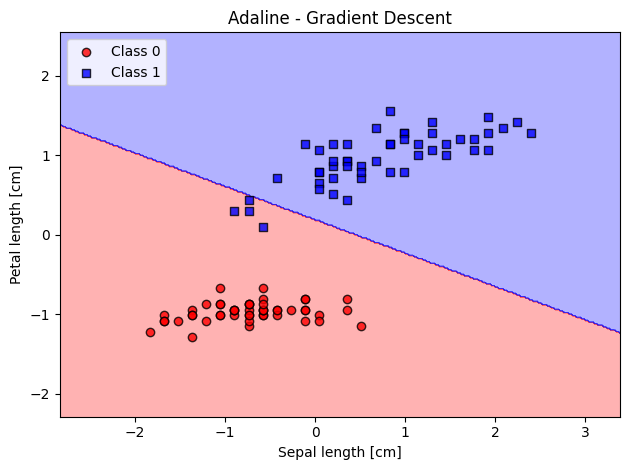

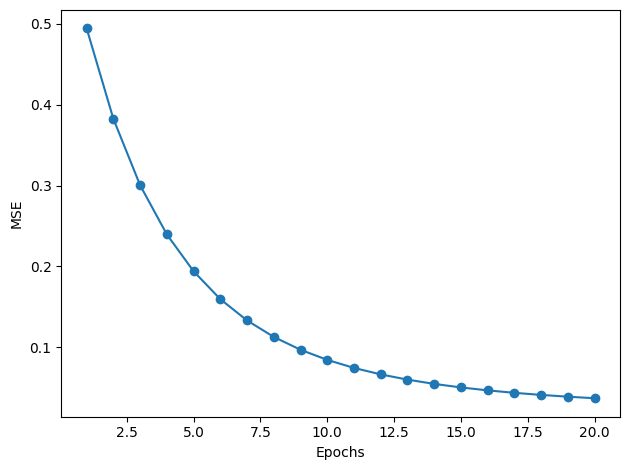

In [20]:
plot_decision_regions(X_std, y, classifier=std_model) 
plt.title('Adaline - Gradient Descent') 
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]') 
plt.legend(loc='upper left')
plt.tight_layout() 
plt.show()
plt.plot(range(1, len(std_model.losses_) + 1), std_model.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('MSE') 
plt.tight_layout() 
plt.show()
